In [25]:
import numpy as np
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from bayes_opt import BayesianOptimization
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv('../datasets/baseball/FG_2010_2018_inning_6_load.csv')

## Explore the Data

In [6]:
data.head(2)

,Season,Name,Team,G,Age,PA,HR,R,RBI,SB,...,f_val_SB_rate,f_val_rate,ny_f_val_rate,HR_rate_std,R_rate_std,RBI_rate_std,SB_rate_std,AVG_std,f_val_std,ny_f_val_std
0,2017,Mookie Betts,Red Sox,153,24,712,24,101,102,26,...,1.83,2.43,0.745460,0.077212,1.205684,1.226771,1.542399,-0.087713,3.964353,12.516023
1,2017,Christian Yelich,Marlins,156,25,695,18,100,81,16,...,0.71,0.77,0.816703,-0.543295,1.037601,0.094554,0.596226,0.534600,1.719685,10.721773


In [7]:
data.describe()

,Season,G,Age,PA,HR,R,RBI,SB,BB%,K%,...,f_val_SB_rate,f_val_rate,ny_f_val_rate,HR_rate_std,R_rate_std,RBI_rate_std,SB_rate_std,AVG_std,f_val_std,ny_f_val_std
count,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,...,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000,1154.000000
mean,2013.550260,141.068458,28.214038,579.262565,18.353553,72.337955,69.570191,10.006932,0.085828,0.183038,...,0.049159,0.195347,0.029685,0.106438,0.175737,0.127342,0.044009,0.127762,0.581287,0.260231
std,2.314325,16.168980,3.662962,86.555025,9.940838,18.773729,22.253659,11.004136,0.030436,0.056472,...,1.147934,1.342655,0.521885,1.015281,0.980659,1.006717,1.014020,0.971037,3.076915,3.240759
min,2010.000000,93.000000,19.000000,400.000000,0.000000,26.000000,17.000000,0.000000,0.021000,0.058000,...,-1.000000,-2.620000,-1.000000,-2.080068,-2.711601,-2.717538,-0.969940,-3.869888,-7.862697,-7.862697
25%,2012.000000,130.000000,26.000000,511.000000,11.000000,58.000000,52.000000,2.000000,0.063000,0.142000,...,-0.770000,-0.727500,-0.366880,-0.695430,-0.534081,-0.627220,-0.666457,-0.535968,-1.690974,-2.160351
50%,2014.000000,145.000000,28.000000,587.500000,17.000000,71.500000,68.000000,6.000000,0.083000,0.179000,...,-0.340000,-0.015000,-0.005117,0.062385,0.141844,0.120951,-0.299616,0.133874,0.417967,0.045613
75%,2016.000000,155.000000,31.000000,652.000000,25.000000,85.000000,85.000000,14.000000,0.105000,0.219000,...,0.527500,0.957500,0.366121,0.822500,0.817740,0.809049,0.457565,0.772735,2.528986,2.423202
max,2017.000000,162.000000,40.000000,754.000000,59.000000,137.000000,139.000000,68.000000,0.206000,0.372000,...,7.140000,6.980000,1.888168,3.665980,3.934791,3.489644,6.189380,3.507457,11.463261,12.516023


In [8]:
data.columns

Index(['Season', 'Name', 'Team', 'G', 'Age', 'PA', 'HR', 'R', 'RBI', 'SB',
       'BB%', 'K%', 'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA', 'wRC+', 'EV',
       'BsR', 'Off', 'O-Swing%', 'Z-Swing%', 'O-Contact%', 'Z-Contact%',
       'GB/FB', 'LD%', 'GB%', 'HR/FB', 'playerid', 'f_val_HR', 'f_val_R',
       'f_val_RBI', 'f_val_SB', 'f_val_BA', 'f_val', 'ny_f_val', 'HR_rate',
       'R_rate', 'RBI_rate', 'SB_rate', 'f_val_HR_rate', 'f_val_R_rate',
       'f_val_RBI_rate', 'f_val_SB_rate', 'f_val_rate', 'ny_f_val_rate',
       'HR_rate_std', 'R_rate_std', 'RBI_rate_std', 'SB_rate_std', 'AVG_std',
       'f_val_std', 'ny_f_val_std'],
      dtype='object')

## Create data structures for use in models

In [9]:
# define columns that won't be used in predictive modeling
drop_cols = ['Name', 'Team', 'f_val_HR', 'f_val_R','f_val_RBI','f_val_SB','f_val_BA', 
             'f_val', 'ny_f_val', 'HR', 'R', 'RBI', 'SB', 'f_val_HR_rate', 'f_val_R_rate', 
             'f_val_RBI_rate', 'f_val_SB_rate', 'f_val_rate', 'ny_f_val_rate', 'HR_rate_std', 
             'R_rate_std', 'RBI_rate_std','SB_rate_std', 'AVG_std', 'f_val_std']

# create DataFrame for use in data visualization
data2 = data.drop(drop_cols, axis=1)

In [10]:
# drop column EV due to missing entries (shows in in-depth data exploration notebook)
data2 = data2.drop('EV', axis=1)

In [11]:
# dropping columns using methodology from in-depth data exploration notebook
drop_cols2 = ['G', 'Age', 'BB%', 'K%', 'BABIP', 'BsR', 'O-Swing%', 
           'Z-Swing%', 'O-Contact%', 'Z-Contact%', 'GB/FB', 'LD%', 
           'GB%', 'SB_rate', 'ISO', 'OBP', 'wOBA', 'wRC+', 'SLG', 'HR/FB']

data3 = data2.drop(drop_cols2, axis=1)

In [14]:
# test on 2 most recent years of data (index 300 is cut off)
# used for all models except Elastic Net
df_train = data3[300:]
df_test = data3[:300]

# use to retain more features for Elastic Net
df_train_enet = data2[300:]
df_test_enet = data2[:300]

In [15]:
# remove target from X
X_train = df_train.drop('ny_f_val_std', axis=1)
X_test = df_test.drop('ny_f_val_std', axis=1)

# use for Elastic Net
X_train_enet = df_train_enet.drop('ny_f_val_std', axis=1)
X_test_enet = df_test_enet.drop('ny_f_val_std', axis=1)

# create target y
y_train = df_train['ny_f_val_std']
y_test = df_test['ny_f_val_std']

In [16]:
# hold onto season column
train_season = X_train['Season']
test_season = X_test['Season']

#hold onto playerid column
train_ID = X_train['playerid']
test_ID = X_test['playerid']

#Now drop the  'playerid' and 'Season' columns since they are unnecessary for the prediction process
X_train.drop(["playerid", "Season"], axis=1, inplace = True)
X_test.drop(["playerid", "Season"], axis=1, inplace = True)
X_train_enet.drop(["playerid", "Season"], axis=1, inplace = True)
X_test_enet.drop(["playerid", "Season"], axis=1, inplace = True)

In [17]:
X_train.head(1)

,PA,AVG,Off,HR_rate,R_rate,RBI_rate
300,654,0.291,23.1,0.124138,0.634483,0.531034


In [18]:
y_train.head()

300    8.210223
301    7.567880
302    6.856675
303    6.657771
304    6.631371
Name: ny_f_val_std, dtype: float64

### Scale the data

In [24]:
# retain column names before changing data structure
X_train_cols = X_train.columns
X_train_enet_cols = X_train_enet.columns

# Create normalized inputs for LinearRegression, XGBoost, and LGBoost
norm_scaler = MinMaxScaler()
X_train_normal = norm_scaler.fit_transform(X_train)
X_test_normal = norm_scaler.transform(X_test)

# create standardized inputs for ENet
stand_scaler = StandardScaler()
X_train_standard = stand_scaler.fit_transform(X_train_enet)
X_test_standard = stand_scaler.transform(X_test_enet)

C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\nkraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  del sys.path[0]


## Modeling

#### Baseline Model

In [26]:
lin_model = LinearRegression()

lin_model.fit(X_train_normal, y_train)
lin_preds = lin_model.predict(X_test_normal)

lin_resids = (y_test - lin_preds)

lin_MSE = mean_squared_error(y_test, lin_preds)
lin_r2 = r2_score(y_test, lin_preds)

print('Lin MSE:', lin_MSE)
print('R2:', lin_r2)

Lin MSE: 8.633967983991392
R2: 0.2378720755819861


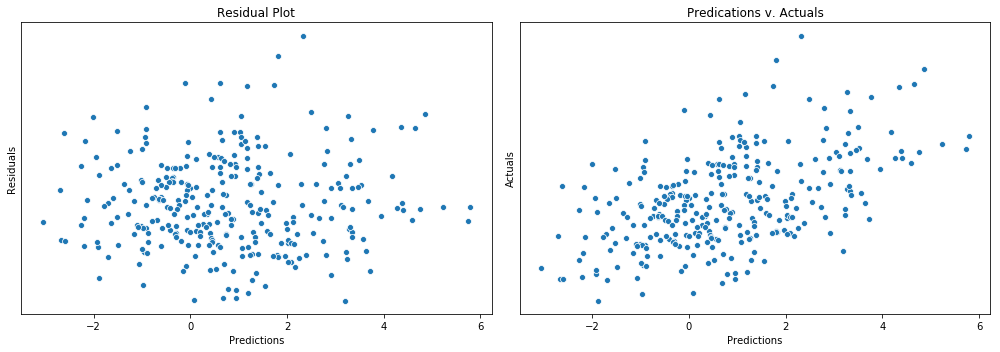

In [27]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=lin_preds, y=lin_resids, ax=axes[0])
axes[0].set_title('Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=lin_preds, y=y_test, ax=axes[1])
axes[1].set_title('Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

In [28]:
# # can use to see coefficients of features
# lin_coef_dict = {}
# for coef, feat in zip(lin_model.coef_,X_train_cols):
#     lin_coef_dict[feat] = coef
# lin_coef_dict

#### XGB Model

In [32]:
#run once to find optimal params (takes awhile)
xgb_reg = XGBRegressor(learning_rate=0.05, random_state=35, objective='reg:squarederror')

params = {
        'n_estimators': [25, 50, 100],
        'min_child_weight': [5, 10, 15],
        'gamma': [1.5, 2, 5],
        'subsample': [0.4, 0.6],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4]
        }

# use GridSearchCV for finding optimal hyperparams
search_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=5)

search_xgb.fit(X_train, y_train)
search_xgb.best_params_

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaco

C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nkraj\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


{'colsample_bytree': 0.6,
 'gamma': 5,
 'max_depth': 4,
 'min_child_weight': 15,
 'n_estimators': 50,
 'subsample': 0.4}

In [33]:
xgb_reg = search_xgb.best_estimator_
xgb_reg.fit(X_train_normal, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=5,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=4, min_child_weight=15, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=35, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=0.4, verbosity=1)

In [34]:
xgb_preds = xgb_reg.predict(X_test_normal)

xgb_resids = (y_test - xgb_preds)

xgb_MSE = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)
print('MSE:', xgb_MSE)
print('R2:', xgb_r2)

MSE: 8.850458333303697
R2: 0.21876228262423603


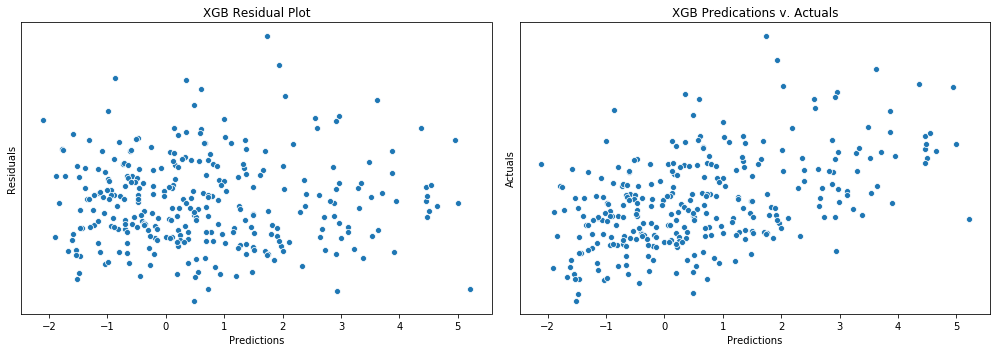

In [35]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=xgb_preds, y=xgb_resids, ax=axes[0])
axes[0].set_title('XGB Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=xgb_preds, y=y_test, ax=axes[1])
axes[1].set_title('XGB Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

#### Elastic Net Model

In [36]:
# use standardized inputs for ENet

# use GridSearchCV for finding optimal hyperparams
search = GridSearchCV(ElasticNet(max_iter=5000, random_state=35, tol=0.1), param_grid={'alpha':np.logspace(-5, 2, 8), 'l1_ratio':[.2, .4, .6, .8,]},
                      scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10, verbose=1)

In [37]:
search.fit(X_train_standard, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent

C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=5000, normalize=False, positive=False, precompute=False,
      random_state=35, selection='cyclic', tol=0.1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]), 'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [38]:
enet_model = search.best_estimator_

# use best enet model and save predictions
enet_preds=enet_model.predict(X_test_standard)

enet_resids = (y_test - enet_preds)

enet_MSE = mean_squared_error(y_test, enet_preds)
enet_r2 = r2_score(y_test, enet_preds)
print('ENet MSE:', enet_MSE)
print('ENet R2:', enet_r2)

ENet MSE: 8.028231538659586
ENet R2: 0.29134096273573007


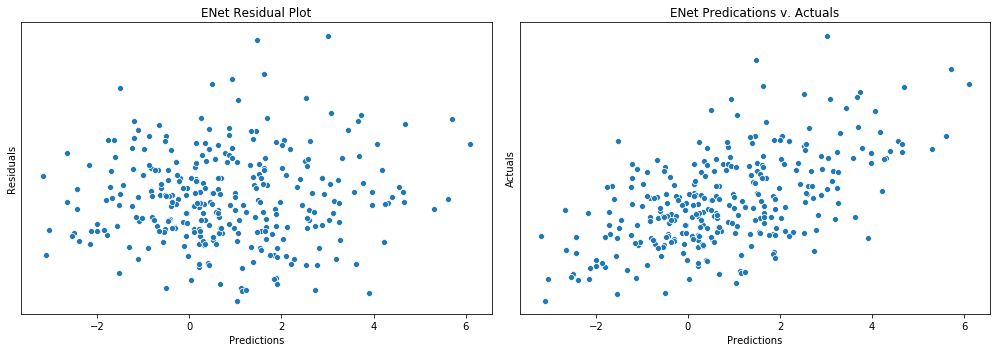

In [39]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=enet_preds, y=enet_resids, ax=axes[0])
axes[0].set_title('ENet Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=enet_preds, y=y_test, ax=axes[1])
axes[1].set_title('ENet Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

#### LightGB Model

In [40]:
# Tune hyperparamters using Bayesian Hyperparamter Optimization
def bayes_parameter_opt_lgb(X, y, init_round=20, opt_round=30, n_folds=5, random_seed=6, 
                            n_estimators=1000, learning_rate=0.05, output_process=False):
  
  train_data = lgb.Dataset(data=X, label=y)

  def lgb_eval(num_leaves, feature_fraction, bagging_fraction, max_depth,
               lambda_l1, lambda_l2, min_split_gain, min_child_weight):
    
    params = {
        'objective':'regression',
        'num_boost_round':1000,
        'learning_rate':0.05, 
        'n_iter':100, 
        'metric':'rmse'
        }
    params["num_leaves"] = int(round(num_leaves))
    params['feature_fraction'] = max(min(feature_fraction, 1), 0)
    params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
    params['max_depth'] = int(round(max_depth))
    params['lambda_l1'] = max(lambda_l1, 0)
    params['lambda_l2'] = max(lambda_l2, 0)
    params['min_split_gain'] = min_split_gain
    params['min_child_weight'] = min_child_weight

    cv_result = lgb.cv(params, train_data, nfold=3, seed=random_seed,
                           stratified=False, verbose_eval =200, metrics=['rmse'])

    return min(cv_result['rmse-mean'])

    # setting range of the parameters
  lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (24, 45),
                                          'feature_fraction': (0.1, 0.9),
                                          'bagging_fraction': (0.5, 1),
                                          'max_depth': (5, 8.99),
                                          'lambda_l1': (0, 5),
                                          'lambda_l2': (0, 3),
                                          'min_split_gain': (0.001, 0.1),
                                          'min_child_weight': (5, 60)}, random_state=0)
  # optimize
  lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
  # output optimization process
  if output_process==True: lgbBO.points_to_csv("bayes_opt_result.csv")
    
  # return
  return lgbBO

In [41]:
opt_params = bayes_parameter_opt_lgb(X_train_normal, y_train, init_round=5, opt_round=10, n_folds=5, random_seed=35)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------------------------------


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.88618 + 0.0828171
[400]	cv_agg's rmse: 2.98704 + 0.0912801
[600]	cv_agg's rmse: 3.05277 + 0.0979858
[800]	cv_agg's rmse: 3.09438 + 0.101345
[1000]	cv_agg's rmse: 3.10192 + 0.0954091
|  1        |  2.763    |  0.7744   |  0.6722   |  3.014    |  1.635    |  6.69     |  40.52    |  0.04432  |  42.73    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.811 + 0.0836564
[400]	cv_agg's rmse: 2.88016 + 0.0848565
[600]	cv_agg's rmse: 2.92499 + 0.079478
[800]	cv_agg's rmse: 2.95718 + 0.0760336
[1000]	cv_agg's rmse: 2.98634 + 0.0662325
|  2        |  2.738    |  0.9818   |  0.4068   |  3.959    |  1.587    |  7.266    |  55.91    |  0.008033 |  25.83    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.8725 + 0.0774851
[400]	cv_agg's rmse: 2.95957 + 0.0822451
[600]	cv_agg's rmse: 3.02479 + 0.0968613
[800]	cv_agg's rmse: 3.06662 + 0.0962967
[1000]	cv_agg's rmse: 3.07951 + 0.0971125
|  3        |  2.757    |  0.5101   |  0.7661   |  3.891    |  2.61     |  8.905    |  48.95    |  0.04669  |  40.39    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.93693 + 0.0724808
[400]	cv_agg's rmse: 3.04625 + 0.0877938
[600]	cv_agg's rmse: 3.11087 + 0.0932762
[800]	cv_agg's rmse: 3.16089 + 0.10192
[1000]	cv_agg's rmse: 3.1973 + 0.100492
|  4        |  2.778    |  0.5591   |  0.6119   |  0.7168   |  2.834    |  7.082    |  27.81    |  0.02719  |  40.26    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.89191 + 0.0828591
[400]	cv_agg's rmse: 2.98206 + 0.0721553
[600]	cv_agg's rmse: 3.04372 + 0.0732119
[800]	cv_agg's rmse: 3.08879 + 0.0746537
[1000]	cv_agg's rmse: 3.12568 + 0.0760152
|  5        |  2.75     |  0.7281   |  0.5547   |  0.09395  |  1.853    |  7.442    |  38.93    |  0.09443  |  38.32    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.9556 + 0.080995
[400]	cv_agg's rmse: 2.9712 + 0.0770969
[600]	cv_agg's rmse: 2.9712 + 0.0770969
[800]	cv_agg's rmse: 2.9712 + 0.0770969
[1000]	cv_agg's rmse: 2.9712 + 0.0770969
|  6        |  2.794    |  0.9544   |  0.8545   |  4.764    |  0.3556   |  8.325    |  6.13     |  0.08717  |  26.38    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.90593 + 0.0857579
[400]	cv_agg's rmse: 2.96078 + 0.0876993
[600]	cv_agg's rmse: 2.96078 + 0.0876993
[800]	cv_agg's rmse: 2.96078 + 0.0876993
[1000]	cv_agg's rmse: 2.96078 + 0.0876993
|  7        |  2.78     |  0.9707   |  0.6073   |  4.948    |  2.69     |  5.943    |  5.394    |  0.09106  |  44.84    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.88117 + 0.0772951
[400]	cv_agg's rmse: 2.98997 + 0.0672083
[600]	cv_agg's rmse: 3.05468 + 0.0577263
[800]	cv_agg's rmse: 3.0982 + 0.0550956
[1000]	cv_agg's rmse: 3.11569 + 0.0533194
|  8        |  2.76     |  0.5      |  0.1      |  4.918    |  3.0      |  6.814    |  26.06    |  0.001    |  27.13    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.94686 + 0.0731974
[400]	cv_agg's rmse: 3.07237 + 0.096479
[600]	cv_agg's rmse: 3.14204 + 0.0993527
[800]	cv_agg's rmse: 3.15465 + 0.0974596
[1000]	cv_agg's rmse: 3.15465 + 0.0974596
|  9        |  2.795    |  0.7875   |  0.692    |  1.888    |  1.347    |  7.363    |  6.097    |  0.02664  |  29.64    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.95853 + 0.0760949
[400]	cv_agg's rmse: 3.00565 + 0.0741577
[600]	cv_agg's rmse: 3.00565 + 0.0741577
[800]	cv_agg's rmse: 3.00565 + 0.0741577
[1000]	cv_agg's rmse: 3.00565 + 0.0741577
|  10       |  2.798    |  0.6772   |  0.7691   |  4.752    |  2.86     |  8.169    |  5.385    |  0.05246  |  28.77    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.8106 + 0.081759
[400]	cv_agg's rmse: 2.86657 + 0.0837224
[600]	cv_agg's rmse: 2.91579 + 0.0732963
[800]	cv_agg's rmse: 2.95051 + 0.071478
[1000]	cv_agg's rmse: 2.98359 + 0.0716537
|  11       |  2.739    |  0.6629   |  0.1518   |  1.688    |  2.345    |  5.193    |  59.74    |  0.05785  |  44.36    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.9702 + 0.0771507
[400]	cv_agg's rmse: 3.07895 + 0.0947083
[600]	cv_agg's rmse: 3.1371 + 0.100634
[800]	cv_agg's rmse: 3.18015 + 0.0953371
[1000]	cv_agg's rmse: 3.20337 + 0.0904823
|  12       |  2.791    |  0.9315   |  0.6945   |  0.1771   |  2.759    |  8.963    |  8.948    |  0.01097  |  41.81    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.97933 + 0.0838957
[400]	cv_agg's rmse: 3.08823 + 0.0958597
[600]	cv_agg's rmse: 3.12879 + 0.0911184
[800]	cv_agg's rmse: 3.12879 + 0.0911184
[1000]	cv_agg's rmse: 3.12879 + 0.0911184
|  13       |  2.796    |  0.9083   |  0.8978   |  0.9904   |  2.64     |  8.853    |  6.602    |  0.07378  |  24.05    |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.92818 + 0.0933386
[400]	cv_agg's rmse: 3.00377 + 0.0811636
[600]	cv_agg's rmse: 3.00563 + 0.0786073
[800]	cv_agg's rmse: 3.00563 + 0.0786073
[1000]	cv_agg's rmse: 3.00563 + 0.0786073
|  14       |  2.775    |  0.5314   |  0.2188   |  4.291    |  0.7475   |  8.444    |  18.31    |  0.07673  |  44.9     |


C:\Users\nkraj\Anaconda3\lib\site-packages\lightgbm\engine.py:503: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[200]	cv_agg's rmse: 2.88822 + 0.0788994
[400]	cv_agg's rmse: 2.99365 + 0.0864816
[600]	cv_agg's rmse: 2.99565 + 0.0836524
[800]	cv_agg's rmse: 2.99565 + 0.0836524
[1000]	cv_agg's rmse: 2.99565 + 0.0836524
|  15       |  2.777    |  0.6263   |  0.8414   |  4.271    |  2.987    |  5.302    |  7.236    |  0.06135  |  25.69    |


In [42]:
params = opt_params.max['params']
params

{'bagging_fraction': 0.6772304887776364,
 'feature_fraction': 0.7690725572268619,
 'lambda_l1': 4.751916401287309,
 'lambda_l2': 2.860162064656824,
 'max_depth': 8.168566654634459,
 'min_child_weight': 5.385011403363813,
 'min_split_gain': 0.05246134093465521,
 'num_leaves': 28.774146147895934}

In [43]:
# set params for model based on optimal params
params = {
    "objective" : "regression",
    "metric" : "rmse",
    "bagging_frequency" : 5,
    "bagging_seed" : 2018,
    "verbosity" : -1,
    'bagging_fraction': 0.7,
    'feature_fraction': 0.8,
    'lambda_l1': 4.75,
    'lambda_l2': 2.9,
    'max_depth': 8,
    'min_child_weight': 5,
    'min_split_gain': 0.1,
    'num_leaves': 29

}

In [44]:
lgb_model = lgb.LGBMRegressor(**params)

In [45]:
lgb_model.fit(X_train_normal, y_train)
lgb_preds = lgb_model.predict(X_test_normal)

lgb_resids = (y_test - lgb_preds)

lgb_MSE = mean_squared_error(y_test, lgb_preds)
lgb_r2 = r2_score(y_test, lgb_preds)
print('LGB MSE:', lgb_MSE)
print('LGB R2:', lgb_r2)

LGB MSE: 9.939477747281376
LGB R2: 0.12263358407397285


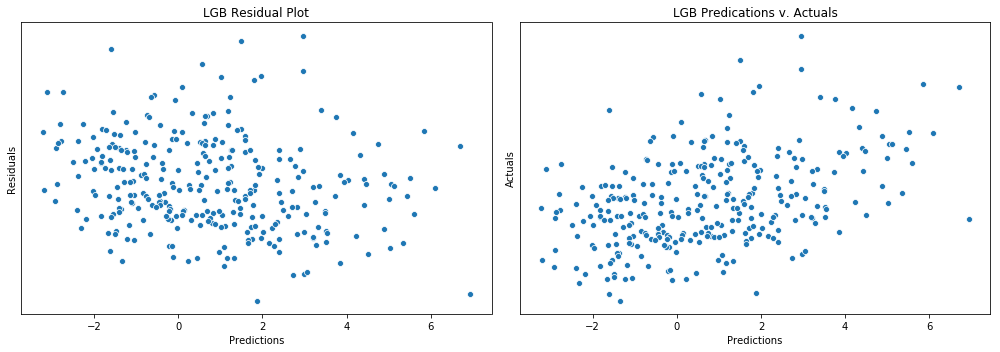

In [46]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=lgb_preds, y=lgb_resids, ax=axes[0])
axes[0].set_title('LGB Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=lgb_preds, y=y_test, ax=axes[1])
axes[1].set_title('LGB Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()

#### SVM Model

In [47]:
# use GridSearchCV for finding optimal hyperparams
svm_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf']
}

svm_search = GridSearchCV(SVR(), param_grid=svm_params,verbose=3,
                      scoring='neg_mean_squared_error',n_jobs=1,cv=5)

svm_search.fit(X_train_normal, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=-9.395265507139335, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=-7.515914057441244, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=-6.260060699872576, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=-6.815840041691453, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV]  C=0.1, gamma=1, kernel=linear, score=-9.789999301434259, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=-9.29968781902151, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.1, kernel=linear, score=-7.515914057441244, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=-6.260060699872576, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=-6.815840041691453, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV]  C=0.1, gamma=0.1, kernel=linear, score=-9.789999301434259, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=-11.474020755997207, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=-8.583692001305602, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=-7.40672412076851, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=

[CV]  C=1, gamma=0.01, kernel=rbf, score=-8.535547442805207, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=-7.368069286972043, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=-7.301162800862446, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=-11.414785007156896, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=-8.882259971394898, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=-7.422996170181117, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=-6.1410080720807905, total=   0.0s
[CV] C=1, gamma=0.001, kernel=linea

[CV]  C=10, gamma=0.0001, kernel=linear, score=-6.159977914732959, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV]  C=10, gamma=0.0001, kernel=linear, score=-7.322849375776013, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV]  C=10, gamma=0.0001, kernel=linear, score=-9.250613417115574, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=-12.776181236868737, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=-9.402404289339628, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=-8.353045155957158, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV]  C=10, gamma=0.0001, kernel=rbf, score=-8.009980551103219, total=   0.0s
[CV] C=10, gamma=0

[CV]  C=100, gamma=0.0001, kernel=rbf, score=-7.298134426361993, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=-11.406392459001168, total=   0.0s


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    3.9s finished
C:\Users\nkraj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [48]:
svm_model = svm_search.best_estimator_

svm_preds = svm_model.predict(X_test_normal)

svm_resids = (y_test - svm_preds)

svm_MSE = mean_squared_error(y_test, svm_preds)
svm_r2 = r2_score(y_test, svm_preds)
print('SVM MSE:', svm_MSE)
print('SVM R2:', svm_r2)

SVM MSE: 8.71049813476533
SVM R2: 0.23111669206969088


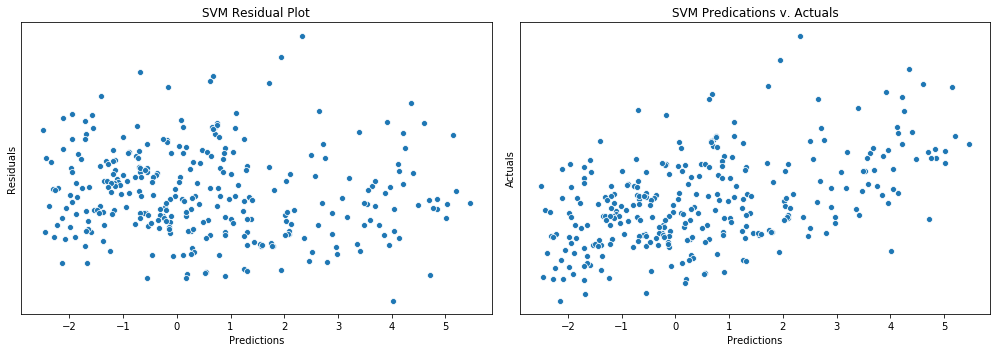

In [49]:
figure, axes = plt.subplots(ncols=2, figsize=(14,5))

sns.scatterplot(x=svm_preds, y=svm_resids, ax=axes[0])
axes[0].set_title('SVM Residual Plot')
axes[0].set(xlabel='Predictions', ylabel='Residuals')
sns.scatterplot(x=svm_preds, y=y_test, ax=axes[1])
axes[1].set_title('SVM Predications v. Actuals')
axes[1].set(xlabel='Predictions', ylabel='Actuals')

plt.setp(axes, yticks=[])
plt.tight_layout()